In [1]:
import tensorflow as tf
from tensorflow import keras

In [11]:
embedding_layer = keras.layers.Embedding(input_dim=4, output_dim=2)

In [12]:
seq = tf.constant([[1,2,3]])
sequence_of_indices= tf.expand_dims(seq, axis = -1)

In [14]:
sequence_of_embedding = embedding_layer(sequence_of_indices)

In [15]:
# ACcess the weights
embedding_layer.get_weights()

[array([[ 0.03180087, -0.02919134],
        [-0.03186908, -0.03930257],
        [ 0.0040468 ,  0.03724012],
        [-0.00729892, -0.032795  ]], dtype=float32)]

### Create and apply embedding layer with mask

In [18]:
mask_embedding_layer = keras.layers.Embedding(input_dim=4, output_dim=2, mask_zero=True)
mask_sequence_embedding = mask_embedding_layer(sequence_of_indices)

In [20]:
mask_sequence_embedding._keras_mask

<tf.Tensor: shape=(1, 3, 1), dtype=bool, numpy=
array([[[ True],
        [ True],
        [ True]]])>

### Now let's try to implement embedding layer in the model, using IMDB dataset

In [21]:

from tensorflow.keras.datasets import imdb
(x_train, y_train),( x_test, y_test) = imdb.load_data()

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
D:\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

In [28]:
# Now we need to padd the squence

from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train_pad = pad_sequences(x_train, maxlen=200, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test, maxlen=200, padding='post', truncating='post')

In [31]:
word_to_index = imdb.get_word_index()
index_to_word = {value:key  for key, value in word_to_index.items()}

In [33]:
x_train_pad.shape


(25000, 200)

In [35]:
max_value = max(word_to_index.values())
embedding_dimension = 16

Things to be noted,
When to use
1) from Logits =True:-  When you have not defined any activation function in output layer
2) from_logits=False:- When you defined any activation function at output.


In [101]:

input = keras.Input(shape = (None,))
embedding = keras.layers.Embedding(input_dim=max_value + 1, output_dim=16)(input)
avg_pool = keras.layers.GlobalAveragePooling1D()(embedding)
den = keras.layers.Dense(20)(avg_pool)
output = keras.layers.Dense(2)(den)

model = keras.Model(input, output)
model.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, None)]            0         
_________________________________________________________________
embedding_28 (Embedding)     (None, None, 16)          1417360   
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 20)                340       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 42        
Total params: 1,417,742
Trainable params: 1,417,742
Non-trainable params: 0
_________________________________________________________________


In [102]:
optimizer = keras.optimizers.Adam()
loss = keras.losses.SparseCategoricalCrossentropy(from_logits= True)
model.compile(optimizer = optimizer, loss=loss, metrics=['acc'])

In [103]:
history = model.fit(x=x_train_pad, y=tf.reshape(y_train,shape=[-1,1]), epochs=5)

Epoch 1/5
782/782 [==============================] - 19s 24ms/step - loss: 0.4473 - acc: 0.7934

<AxesSubplot:>

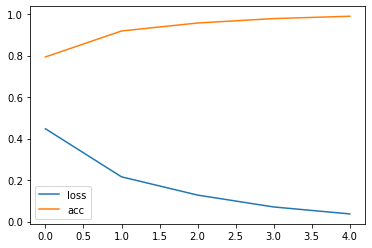

In [107]:
import pandas as pd
pd.DataFrame(history.history).plot()